# General Overview

## Business Understanding
Microsoft wants to know how to get into the movie businesss. In order for a company to succeed, it requires a sustainable business model. We are here to help substantiate hypotheses of potential business models with data. This particular data set helps us understand the relationship between the production budget of a movie and its gross revenue returns. 

## Data Understanding

In [2]:
import pandas as pd
df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
#cleaning the production budget column, domestic_gross column, worldwide_gross column
df['prod_budg_fixed'] = df['production_budget'].str.replace('$', '').str.replace(',','').astype(float)
df['dom_gross_fixed'] = df['domestic_gross'].str.replace('$', '').str.replace(',','').astype(float)
df['world_gross_fixed'] = df['worldwide_gross'].str.replace('$', '').str.replace(',','').astype(float)

In [5]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,prod_budg_fixed,dom_gross_fixed,world_gross_fixed
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000.0,620181382.0,1.316722e+09


In [6]:
df.describe()

,id,prod_budg_fixed,dom_gross_fixed,world_gross_fixed
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


y=3.126943x+(-7285667.054592)


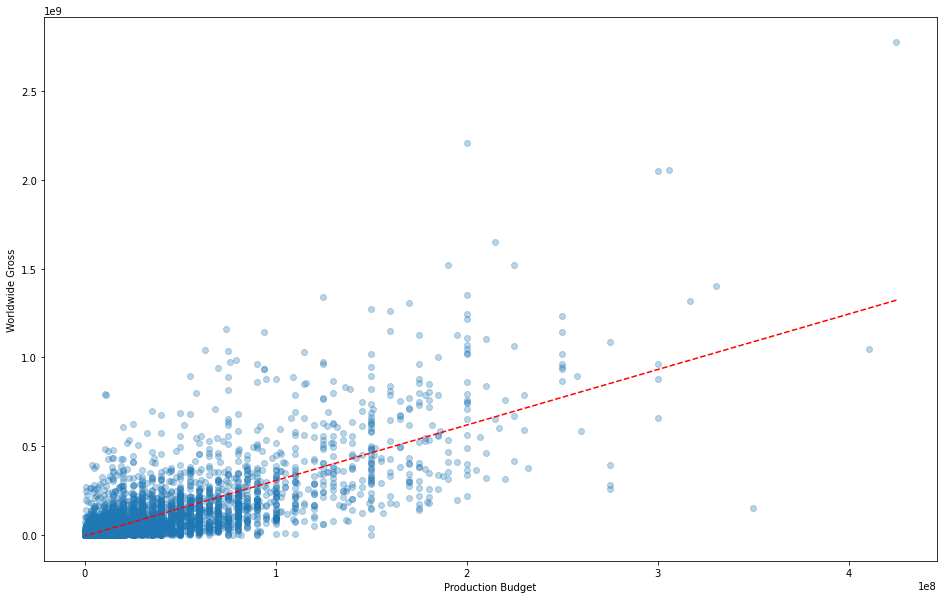

In [56]:
#scatterplot of production budget vs worldwide gross
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import seaborn as sns
import numpy as np
import pylab as plb


#code for basic scatter plot
x = df['prod_budg_fixed']
y = df['world_gross_fixed']

fig, ax = plt.subplots(figsize=(16, 10))

#going for more of a 'heatmap' style plot for readability, so opacity is low
ax.scatter(x, y, alpha=0.3)
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross')

#plt.ylim(-100000, 1000000000)
#plt.xlim(-100000, 125000000)

#finding the trend line
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plb.plot(x, p(x), 'r--')
#Supposedly the equation for the line
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

#needs further cleaning; can see somewhat of a positive correlation but too many outliers
#a Pearson correlation coefficient column would be good here

y=1.119087x+(6523888.576660)


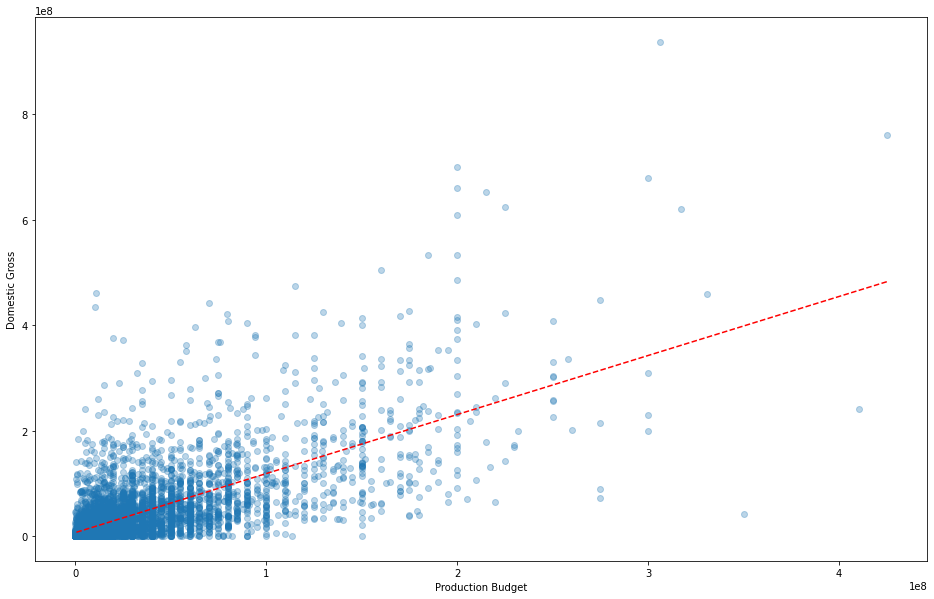

In [36]:
#scatterplot of production budge vs domestic gross
x = df['prod_budg_fixed']
y = df['dom_gross_fixed']

fig, ax = plt.subplots(figsize=(16, 10))

ax.scatter(x, y, alpha=0.3)
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic Gross')

#finding the trend line
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plb.plot(x, p(x), 'r--')
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

In [14]:
#creating new columns for correlation coefficient
df.corr(method='pearson')

,id,prod_budg_fixed,dom_gross_fixed,world_gross_fixed
id,1.000000,-0.035278,0.008255,-0.009422
prod_budg_fixed,-0.035278,1.000000,0.685682,0.748306
dom_gross_fixed,0.008255,0.685682,1.000000,0.938853
world_gross_fixed,-0.009422,0.748306,0.938853,1.000000


In [15]:
#The production budget and worldwide gross seem to have a pretty high positive correlation. Again, i'll have to check to see
#if this is at all affected by the outliers 
#such as the film "Avatar", which is an outlier in both production budget and worldwide gross)

#However, at this stage in the cleaning, it does seem that, for Microsoft, there is a good chance that a higher production budget
#will lead to a higher worldwide gross